# Multi Class Prediction of Cirrhosis Outcomes
- In this project your task is to use a multi-class approach to predict the the outcomes of patients with cirrhosis. 
- https://forecastegy.com/posts/lightgbm-multiclass-classification-python/

### Let's import the necessary libraries for importing the data

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### We have dataset in three forms `train` , `test` and `original`.

In [41]:
train_df = pd.read_csv('playground-series-s3e26/train.csv',index_col = 'id')
test_df = pd.read_csv('playground-series-s3e26/test.csv',index_col = 'id')
orig_df = pd.read_csv('playground-series-s3e26/cirrhosis.csv',index_col = 'ID')

In [42]:
sample_df = pd.read_csv('playground-series-s3e26/sample_submission.csv', index_col = 'id')

### Let's display the data one by one and find any missing values if they have any.

In [43]:
train_df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [44]:
train_df.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [45]:
test_df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,,,,,,,,,
7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [46]:
test_df.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

## Now let's see the original dataset

In [47]:
orig_df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [48]:
orig_df.shape , train_df.shape , test_df.shape

((418, 19), (7905, 19), (5271, 18))

In [49]:
orig_df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

## Let's see the sample dataset

In [50]:
sample_df.head()

,Status_C,Status_CL,Status_D
id,,,
7905,0.628084,0.034788,0.337128
7906,0.628084,0.034788,0.337128
7907,0.628084,0.034788,0.337128
7908,0.628084,0.034788,0.337128
7909,0.628084,0.034788,0.337128


### Now let's merge the training dataste with original dataset

In [51]:
train_df = train_df.merge(orig_df, how = 'outer')
train_df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8318,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
8319,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
8320,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
8321,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [52]:
train_df.isna().sum()

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64

## Drop missing values

In [53]:
train_df = train_df.dropna().reset_index(drop = True)
train_df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,1153,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0,C
8177,994,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,C
8178,939,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,C
8179,839,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,C


In [54]:
train_df.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

### As we can see in the dataset that there are Categorical alphabetic values and Numerical values `0` and `1`.So , our first step is to convert categorical values into numerical values.
- Converting categorical values can be done into two ways
- 1. One-Hot Encoding
- 2. Label Encoding

### Let's apply Label Encoding to our data

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
train_df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


### Python code to encode the variables

In [57]:
def train_data_encode(df,columns):
    encoders = {}
    for col in columns:
        le = LabelEncoder().fit(df[col])
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
    return df, encoders
    
columns_to_encode = ['Sex','Ascites','Hepatomegaly','Spiders','Edema','Drug','Status']
train_df_encoded , encoders = train_data_encode(train_df , columns_to_encode)
print(train_df_encoded.head())

   N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
0     999     0  21532    1        0             0        0      0        2.3   
1    2574     1  19237    0        0             0        0      0        0.9   
2    3428     1  13727    0        0             1        1      2        3.3   
3    2576     1  18460    0        0             0        0      0        0.6   
4     788     1  16658    0        0             1        0      0        1.1   

   Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  \
0        316.0     3.35   172.0    1601.0  179.80           63.0      394.0   
1        364.0     3.54    63.0    1440.0  134.85           88.0      361.0   
2        299.0     3.55   131.0    1029.0  119.35           50.0      199.0   
3        256.0     3.50    58.0    1653.0   71.30           96.0      269.0   
4        346.0     3.65    63.0    1181.0  125.55           96.0      298.0   

   Prothrombin  Stage  Status  
0     

In [58]:
train_df_encoded.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
2,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2
3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0
4,788,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0


### Lets perform the same lable encoding on the test dataset

In [59]:
def test_data_encode(df,columns):
    encoders = {}
    for col in columns:
        le = LabelEncoder().fit(df[col])
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
    return df, encoders
    
columns_to_encode = ['Sex','Ascites','Hepatomegaly','Spiders','Edema','Drug']
test_df_encoded , encoders = test_data_encode(test_df , columns_to_encode)
print(test_df_encoded.head())

      N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
id                                                                      
7905    3839     0  19724    0        0             1        0      0   
7906    2468     0  14975    0        0             0        0      0   
7907      51     1  13149    0        0             1        0      2   
7908    2330     0  20510    0        0             0        0      0   
7909    1615     0  21904    0        0             1        0      0   

      Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
id                                                                
7905        1.2        546.0     3.37    65.0    1636.0  151.90   
7906        1.1        660.0     4.22    94.0    1257.0  151.90   
7907        2.0        151.0     2.96    46.0     961.0   69.75   
7908        0.6        293.0     3.85    40.0     554.0  125.55   
7909        1.4        277.0     2.97   121.0    1110.0  125.00   

      Trygliceride

In [60]:
test_df_encoded.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,,,,,,,,,
7905,3839,0,19724,0,0,1,0,0,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
7906,2468,0,14975,0,0,0,0,0,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
7907,51,1,13149,0,0,1,0,2,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
7908,2330,0,20510,0,0,0,0,0,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
7909,1615,0,21904,0,0,1,0,0,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


### Now we have both encoded training and test data let's apply the Machine learning Algorithm to predict the status of the `status of the patients`.
- As we can see in our `sample submission data` the output is in continous probability form , thus we understand that this is the regression problem to preidct the probability of each `STATUS[]`.

- Before applying the algorithm lets perform some data visualization on the given datset.

## Lets Visualise the data 
- Refer to this link of seaborn visualisation library
- https://seaborn.pydata.org/tutorial/axis_grids.html

<AxesSubplot:>

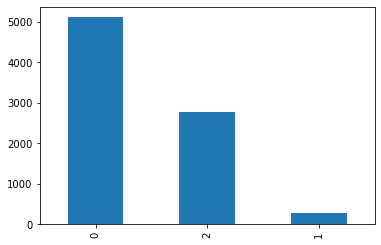

In [61]:
train_df_encoded['Status'].value_counts().plot(kind = 'bar')

### Split data into training and testing

In [66]:
from sklearn.model_selection import train_test_split
X = train_df_encoded.drop(columns = ['Status'])
y = train_df_encoded[['Status']]
# Split the data into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape , X_valid.shape , y_train.shape , y_valid.shape


((6544, 18), (1637, 18), (6544, 1), (1637, 1))

In [70]:
X_train.dtypes

N_Days             int64
Drug               int32
Age                int64
Sex                int32
Ascites            int32
Hepatomegaly       int32
Spiders            int32
Edema              int32
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

# Create a Light GBM model and evalaute performance

## Way 1

In [91]:
import lightgbm
from sklearn.metrics import roc_auc_score
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)
lgbm_pred_proba = lgbm_classifier.predict_proba(X_valid)
lgbm_log_loss = log_loss(y_valid, lgbm_pred_proba)
print("LightGBMClassifier Log Loss:", lgbm_log_loss)

C:\Users\Meemansha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LightGBMClassifier Log Loss: 0.4509560028595254


In [93]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_pred_proba = xgb_classifier.predict_proba(X_valid)
xgb_log_loss = log_loss(y_valid, xgb_pred_proba)
print("XGBoostClassifier Log Loss:", xgb_log_loss)

XGBoostClassifier Log Loss: 0.4955071997478318


In [94]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_pred_proba = gb_classifier.predict_proba(X_valid)
gb_log_loss = log_loss(y_valid, gb_pred_proba)
print("Gradient Boosting Classifier Log Loss:", gb_log_loss)

C:\Users\Meemansha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Classifier Log Loss: 0.4409600289238064


In [95]:
test_predictions = gb_classifier.predict_proba(test_df_encoded)

In [96]:
test_predictions

array([[0.59681718, 0.02720082, 0.375982  ],
       [0.75005353, 0.09373914, 0.15620732],
       [0.05848546, 0.07941469, 0.86209986],
       ...,
       [0.85283875, 0.01444879, 0.13271246],
       [0.98141108, 0.00349299, 0.01509593],
       [0.41668166, 0.0283663 , 0.55495204]])

In [99]:
sample_df['Status_C'] = test_predictions[:, 0]
sample_df['Status_CL'] = test_predictions[:, 1]
sample_df['Status_D'] = test_predictions[:, 2]

In [100]:
sample_df.to_csv('submission_way1.csv',index=False)
sample_df.head()

,Status_C,Status_CL,Status_D
id,,,
7905,0.596817,0.027201,0.375982
7906,0.750054,0.093739,0.156207
7907,0.058485,0.079415,0.862100
7908,0.955532,0.005478,0.038990
7909,0.813908,0.028686,0.157406


## Way 2

In [106]:
from sklearn.metrics import accuracy_score, classification_report

In [101]:
train_data = lightgbm.Dataset(X_train , label = y_train)
valid_data = lightgbm.Dataset(X_valid , label = y_valid)

In [102]:
parameters = {' metrics': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
               'num_leaves': '63',
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate' : 0.01,
              'verbose': -1,
             }

In [103]:
model_lgbm = lightgbm.train(parameters,
                           train_data,
                           valid_sets = valid_data,
                           num_boost_round = 5000,
                           early_stopping_rounds = 50,
                           )

C:\Users\Meemansha\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.844825
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.862314
[3]	valid_0's auc: 0.876844
[4]	valid_0's auc: 0.885577
[5]	valid_0's auc: 0.888793
[6]	valid_0's auc: 0.891536
[7]	valid_0's auc: 0.889601
[8]	valid_0's auc: 0.889449
[9]	valid_0's auc: 0.891341
[10]	valid_0's auc: 0.892026
[11]	valid_0's auc: 0.892387
[12]	valid_0's auc: 0.8935
[13]	valid_0's auc: 0.894691
[14]	valid_0's auc: 0.895188
[15]	valid_0's auc: 0.895431
[16]	valid_0's auc: 0.896054
[17]	valid_0's auc: 0.896217
[18]	valid_0's auc: 0.895934
[19]	valid_0's auc: 0.895485
[20]	valid_0's auc: 0.896015
[21]	valid_0's auc: 0.8968
[22]	valid_0's auc: 0.896599
[23]	valid_0's auc: 0.896334
[24]	valid_0's auc: 0.896519
[25]	valid_0's auc: 0.89661
[26]	valid_0's auc: 0.896155
[27]	valid_0's auc: 0.896001
[28]	valid_0's auc: 0.896033
[29]	valid_0's auc: 0.896365
[30]	valid_0's auc: 0.896133
[31]	valid_0's auc: 0.896122
[32]	valid_0's auc: 0.896176
[33]	valid_0's auc: 0.896

[305]	valid_0's auc: 0.906088
[306]	valid_0's auc: 0.906069
[307]	valid_0's auc: 0.906078
[308]	valid_0's auc: 0.906075
[309]	valid_0's auc: 0.906089
[310]	valid_0's auc: 0.90607
[311]	valid_0's auc: 0.906162
[312]	valid_0's auc: 0.906183
[313]	valid_0's auc: 0.906234
[314]	valid_0's auc: 0.906231
[315]	valid_0's auc: 0.906218
[316]	valid_0's auc: 0.90625
[317]	valid_0's auc: 0.906243
[318]	valid_0's auc: 0.906267
[319]	valid_0's auc: 0.906231
[320]	valid_0's auc: 0.906299
[321]	valid_0's auc: 0.906247
[322]	valid_0's auc: 0.906296
[323]	valid_0's auc: 0.906362
[324]	valid_0's auc: 0.906386
[325]	valid_0's auc: 0.90637
[326]	valid_0's auc: 0.906347
[327]	valid_0's auc: 0.906391
[328]	valid_0's auc: 0.906294
[329]	valid_0's auc: 0.906267
[330]	valid_0's auc: 0.906251
[331]	valid_0's auc: 0.906201
[332]	valid_0's auc: 0.906158
[333]	valid_0's auc: 0.906205
[334]	valid_0's auc: 0.906188
[335]	valid_0's auc: 0.906242
[336]	valid_0's auc: 0.906378
[337]	valid_0's auc: 0.906362
[338]	valid_0

In [104]:
y_train_pred = model_lgbm.predict(X_train)
y_valid_pred = model_lgbm.predict(X_valid)

## Find predictions for test data

In [132]:
y_test_pred = model_lgbm.predict(test_df_encoded)
y_test_pred

array([0.84867995, 0.4984284 , 1.72125738, ..., 0.19884948, 0.02878261,
       1.06376197])

## Way 3

- Take the help of this notebook
- https://www.kaggle.com/code/swufeleo/multi-class-prediction-of-cirrhosis-outcomes

### Perform Light GBM Classification Algorithm on the dataset
- Documentation https://github.com/microsoft/LightGBM
- Help https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/
- and https://www.kaggle.com/code/namishjindal4/multi-class-prediction-of-cirrhosis-outcomes

- 1. LightGBM is a gradient boosting framework that uses tree based learning algorithms
- 2. Faster training speed and higher efficiency.
- 3. Lower memory usage.
- 4. Better accuracy.
- 5. Support of parallel, distributed, and GPU learning.
- 6. Capable of handling large-scale data.
-** LightGBM can use categorical features as input directly. It doesn’t need to convert to one-hot encoding, and is much faster than one-hot encoding (about 8x speed-up).

In [109]:
!pip install lightgbm

In [127]:
import lightgbm as lgb
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report

parameters = {' metric': 'logloss',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
               'num_leaves': '63',
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate' : 0.01,
              'verbose': -1,
             }




model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=None, importance_type='split')
model.fit(X_train,y_train,eval_set=[(X_valid,y_valid),(X_train,y_train)],verbose=20,eval_metric='logloss')



# Make predictions on the validation set
y_pred_val = model.predict(X_valid)

# Evaluate the model on validation dataset
print("Accuracy:", accuracy_score(y_valid, y_pred_val))
print("Classification Report:\n", classification_report(y_valid, y_pred_val))


C:\Users\Meemansha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Meemansha\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's multi_logloss: 0.358848	valid_0's multi_logloss: 0.468264
[40]	training's multi_logloss: 0.266395	valid_0's multi_logloss: 0.443189
[60]	training's multi_logloss: 0.214868	valid_0's multi_logloss: 0.442334
[80]	training's multi_logloss: 0.177771	valid_0's multi_logloss: 0.447277
[100]	training's multi_logloss: 0.148116	valid_0's multi_logloss: 0.450956
Accuracy: 0.8344532681734881
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1018
           1       0.58      0.25      0.35        57
           2       0.81      0.75      0.78       562

    accuracy                           0.83      1637
   macro avg       0.75      0.64      0.67      1637
weighted avg       0.83      0.83      0.83      1637



In [133]:
# Let's get the evaluation report on test set

y_pred = model.predict(test_df_encoded)


In [130]:
y_pred.shape

(5271,)

In [23]:
submission.to_csv('submission_cirr.csv', index = False)